# LIS Data Visualization
- Data provided by Sujay Kumar's group. Metadata located [here](http://himat.org/team-documents/data-access/land-information-system/)
- In ADAPT Data are located at `/att/pubrepo/hma_data/products/LIS/SURFACEMODEL/`

In [5]:
# Import the necessary libraries
%matplotlib inline
import os
import sys

import xarray as xr

from dask.diagnostics import ProgressBar

import seaborn as sb

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

sys.path.append('../../scripts/')
from LIS import utils
from tools import animation_tools

#### Define the main data directory

In [6]:
datadir = '/att/pubrepo/hma_data/products/LIS/SURFACEMODEL'

#### Create an xarray dataset. This uses mf_dataset to read all NetCDF files into one dataset. Our utility also modifies the data to get longitude and latitude into the coordinate structure.

In [7]:
%time ds = utils.get_xr_dataset(datadir, multiple_nc=True)

CPU times: user 7min 43s, sys: 8.96 s, total: 7min 52s
Wall time: 11min 29s


#### Look at the contents of the dataset

In [8]:
ds

<xarray.Dataset>
Dimensions:           (SnowIce_profiles: 3, SnowLiq_profiles: 3, SnowTProf_profiles: 3, SoilMoist_profiles: 4, SoilTemp_profiles: 4, east_west: 1896, north_south: 1696, time: 5478, z_soil_profiles: 4)
Coordinates:
  * time              (time) datetime64[ns] 2001-01-01 2001-01-02 2001-01-03 ...
    longitude         (north_south, east_west) float64 66.03 66.04 66.05 ...
    latitude          (north_south, east_west) float64 22.02 22.02 22.02 ...
Dimensions without coordinates: SnowIce_profiles, SnowLiq_profiles, SnowTProf_profiles, SoilMoist_profiles, SoilTemp_profiles, east_west, north_south, z_soil_profiles
Data variables:
    lat               (time, north_south, east_west) float64 nan nan nan nan ...
    lon               (time, north_south, east_west) float64 nan nan nan nan ...
    Swnet_tavg        (time, north_south, east_west) float64 nan nan nan nan ...
    Lwnet_tavg        (time, north_south, east_west) float64 nan nan nan nan ...
    Qle_tavg          (time

### Question: what is the mean air temperature across the domain for the entire time period?

* use xarray's groupby functionality

[########################################] | 100% Completed | 22min 11.1s


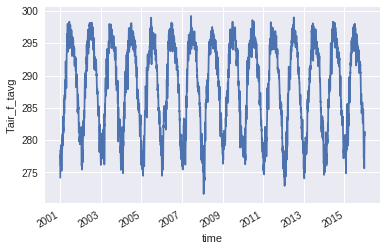

In [8]:
with ProgressBar():
    ds['Tair_f_tavg'].groupby('time').mean().plot()

### Now try calculating the total swe across the region:

[########################################] | 100% Completed | 18min 52.4s


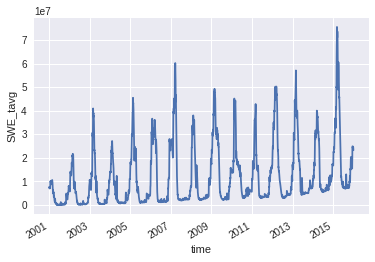

In [9]:
with ProgressBar():
    ds['SWE_tavg'].groupby('time').sum().plot()

## Make a static plot using cartopy

C:\Users\Anthony Arendt\Anaconda3\lib\site-packages\numpy\lib\shape_base.py:431: FutureWarning: in the future np.array_split will retain the shape of arrays with a zero size, instead of replacing them by `array([])`, which always has a shape of (0,).
  FutureWarning)


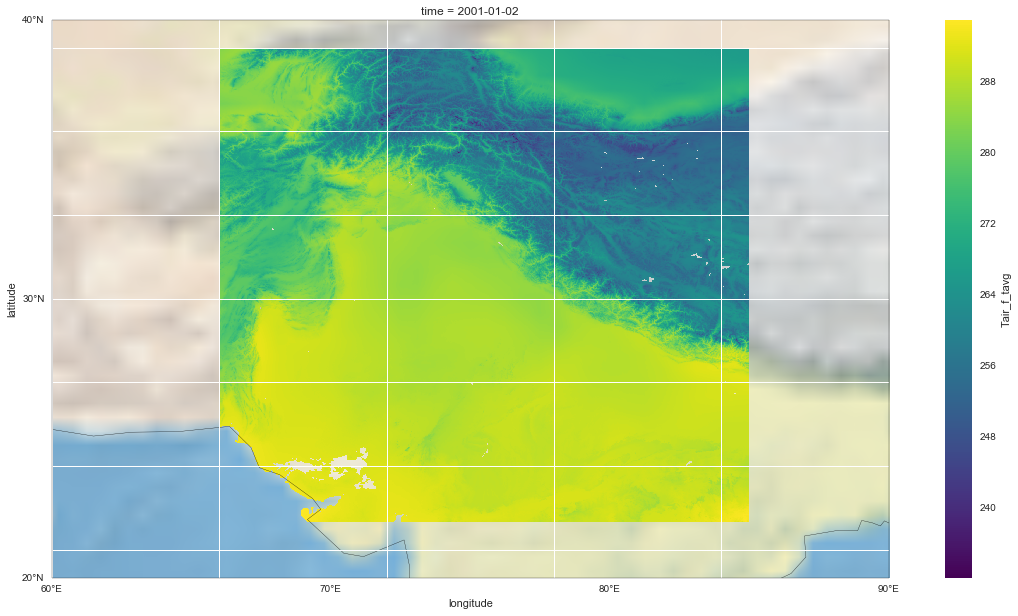

In [9]:
# Set up cartopy axes
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img()
ax.gridlines()
ax.coastlines()
ax.set_ylim([20,40])
ax.set_xlim([60,90])
ax.set_yticks([20, 30, 40], crs=ccrs.PlateCarree())
ax.set_xticks([60, 70, 80, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the data of first timestamp only (This is for multiple data)
ds.Tair_f_tavg[1,:,:].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude', add_colorbar=True)

### Working on code to make an animation (in development)

In [4]:
times = list(ds.time.values)

In [5]:
times_filt = times[0:20]

In [10]:
figs = []
for i, t in enumerate(times_filt):
    # Set up cartopy axes
    fig = plt.figure(figsize=(20,10))
#     ds.Tair_f_tavg[i,:,:].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude', add_colorbar=True)
    ds.Tair_f_tavg[i,:,:].plot(x='longitude', y='latitude', vmin=240, vmax=290)
    figs.append(fig)
    plt.close(fig)

In [11]:
# animation_tools.interact_animate_figs(figs)

In [12]:
images = animation_tools.make_images(figs, dpi=150)


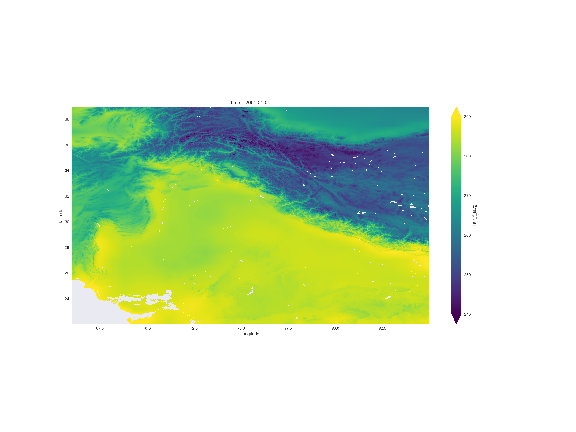
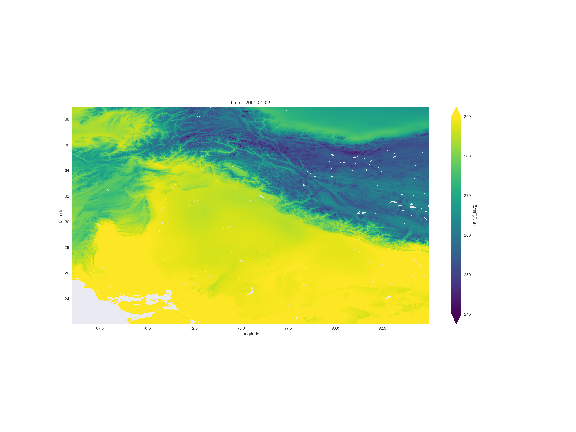
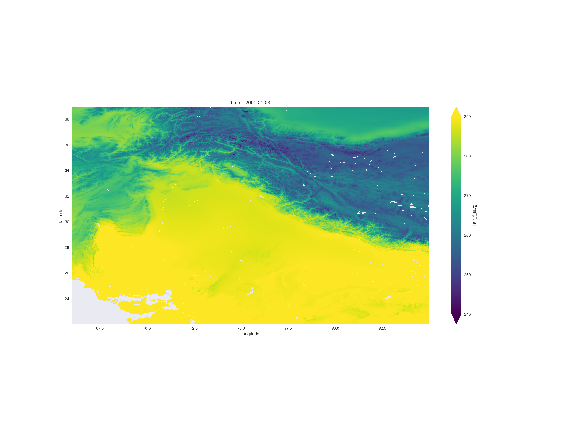
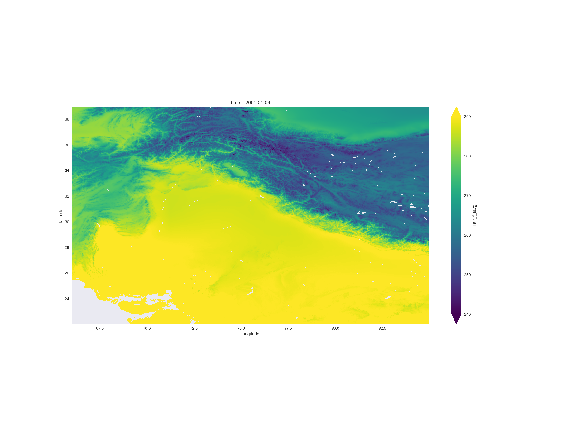
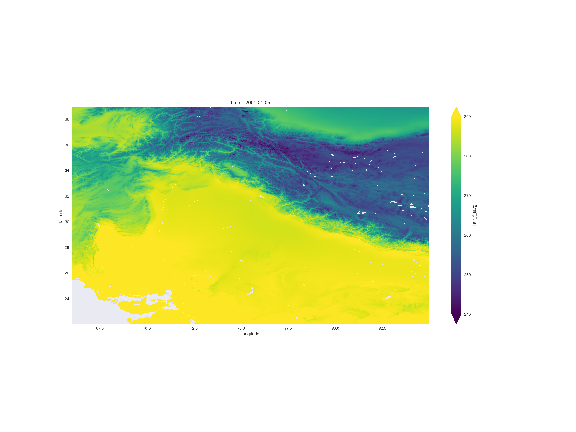
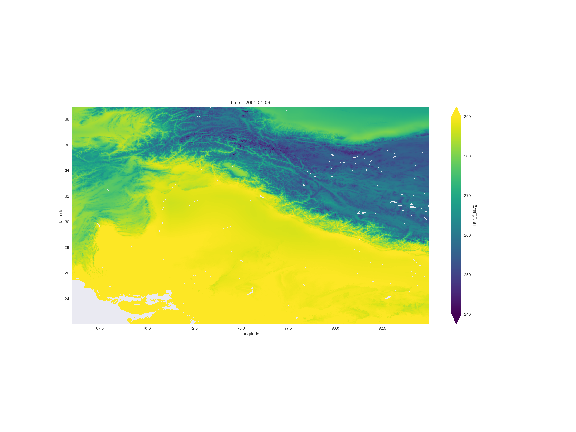
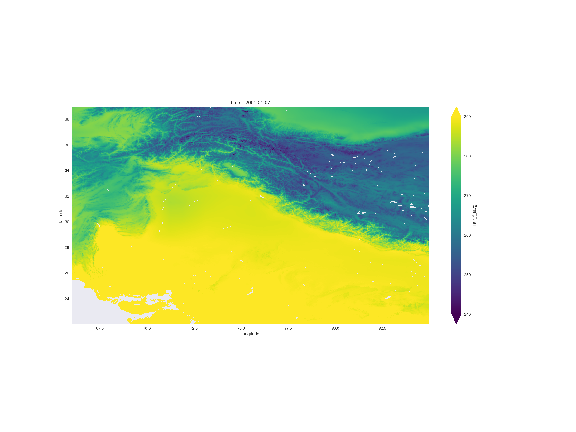
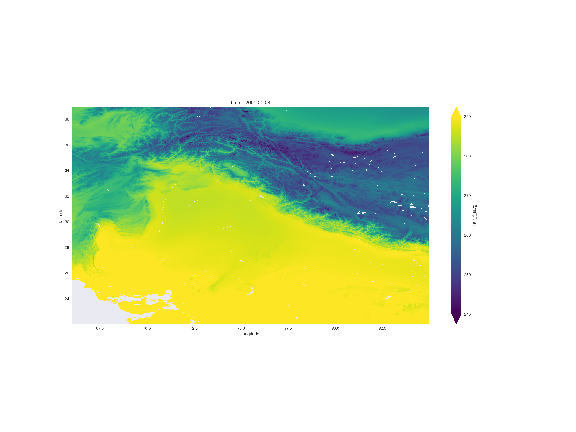
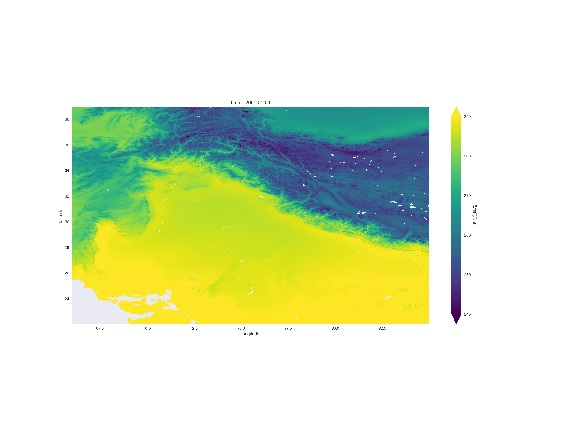
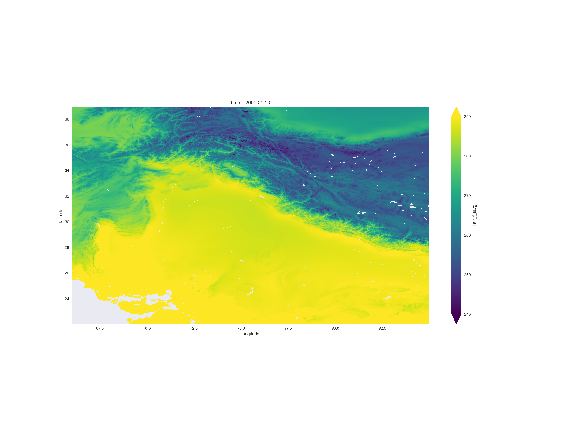
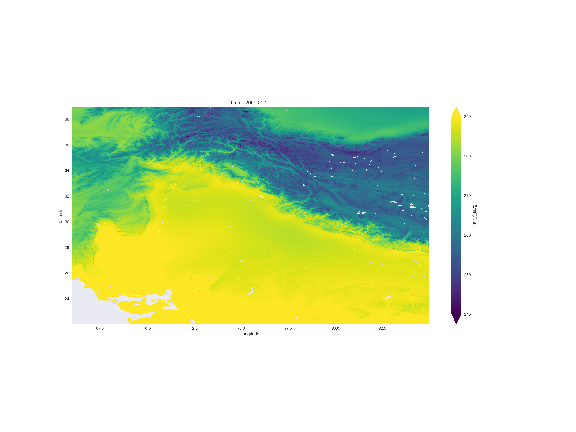
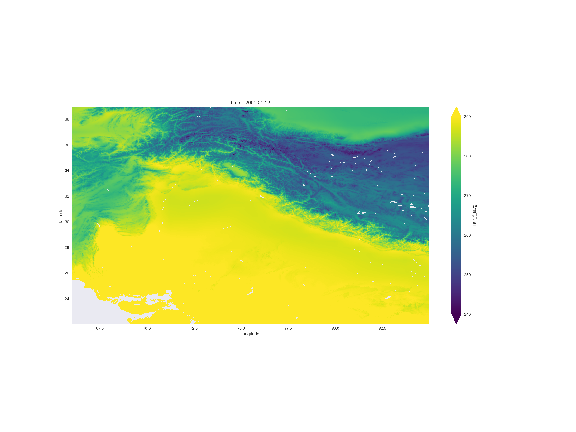
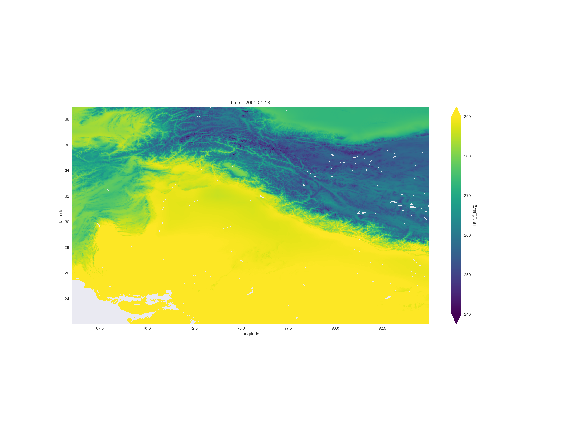
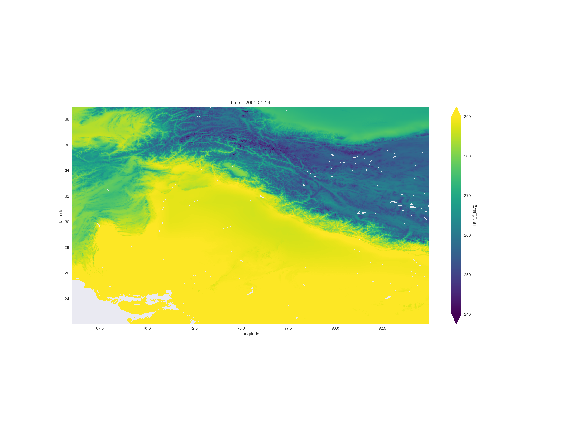
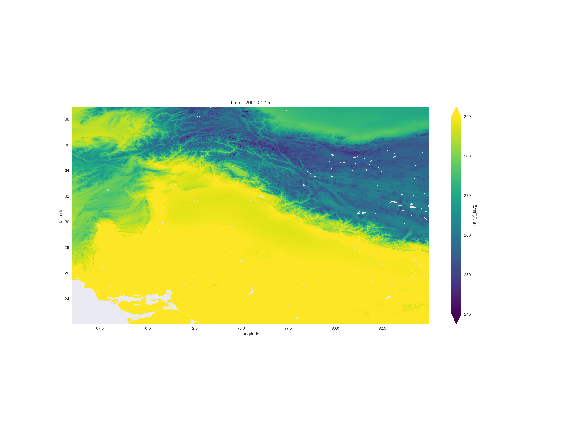
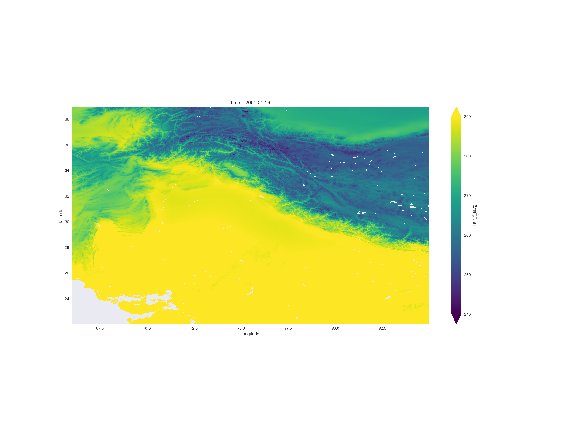
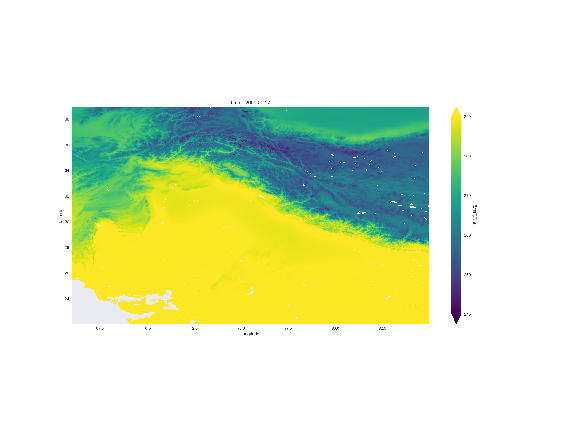
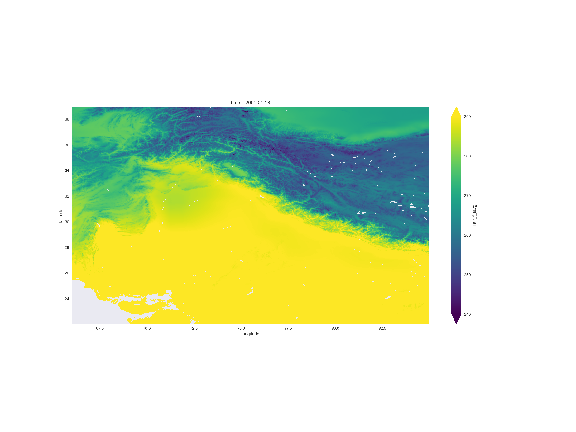
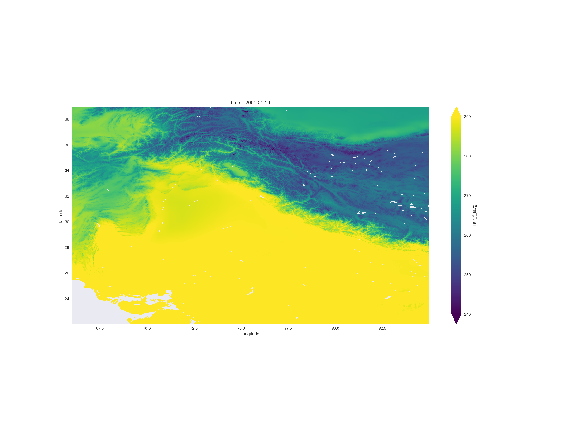
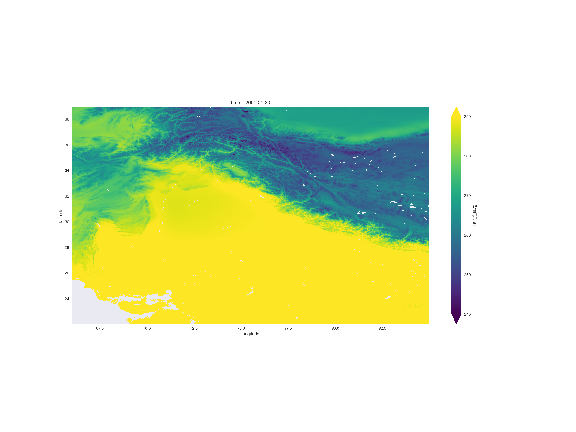

In [13]:
animation_tools.JSAnimate_images(images, figsize=(8,6))